In [1]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])



In [3]:
basepath = Path("/scratch/crobin/earthnet2023/")
train_paths = list(basepath.glob("train/*/*.nc"))
test_paths = list(basepath.glob("test/*/*.nc"))
pred_paths = list(Path("/Net/Groups/BGI/scratch/crobin/earthnet-models-pytorch/experiments/en23/convlstm_ae/convlstm_ae/config_lr_1e-6/preds/iid/").glob("*/*"))
interpolated_paths = list(Path("/scratch/crobin/earthnet2023_interpolated/").glob("train/*/*.nc"))
print("len train set: ", len(train_paths))
print("len test set: ", len(test_paths))
print("len prediction set: ", len(pred_paths))
print("len interpolated set:", len(interpolated_paths))

len train set:  44141
len test set:  4534
len prediction set:  0
len interpolated set: 100


In [4]:
filepath = Path('/Net/Groups/BGI/scratch/crobin/PythonProjects/EarthNet/earthnet-models-pytorch/Data_analysis/32SKF5535.nc')

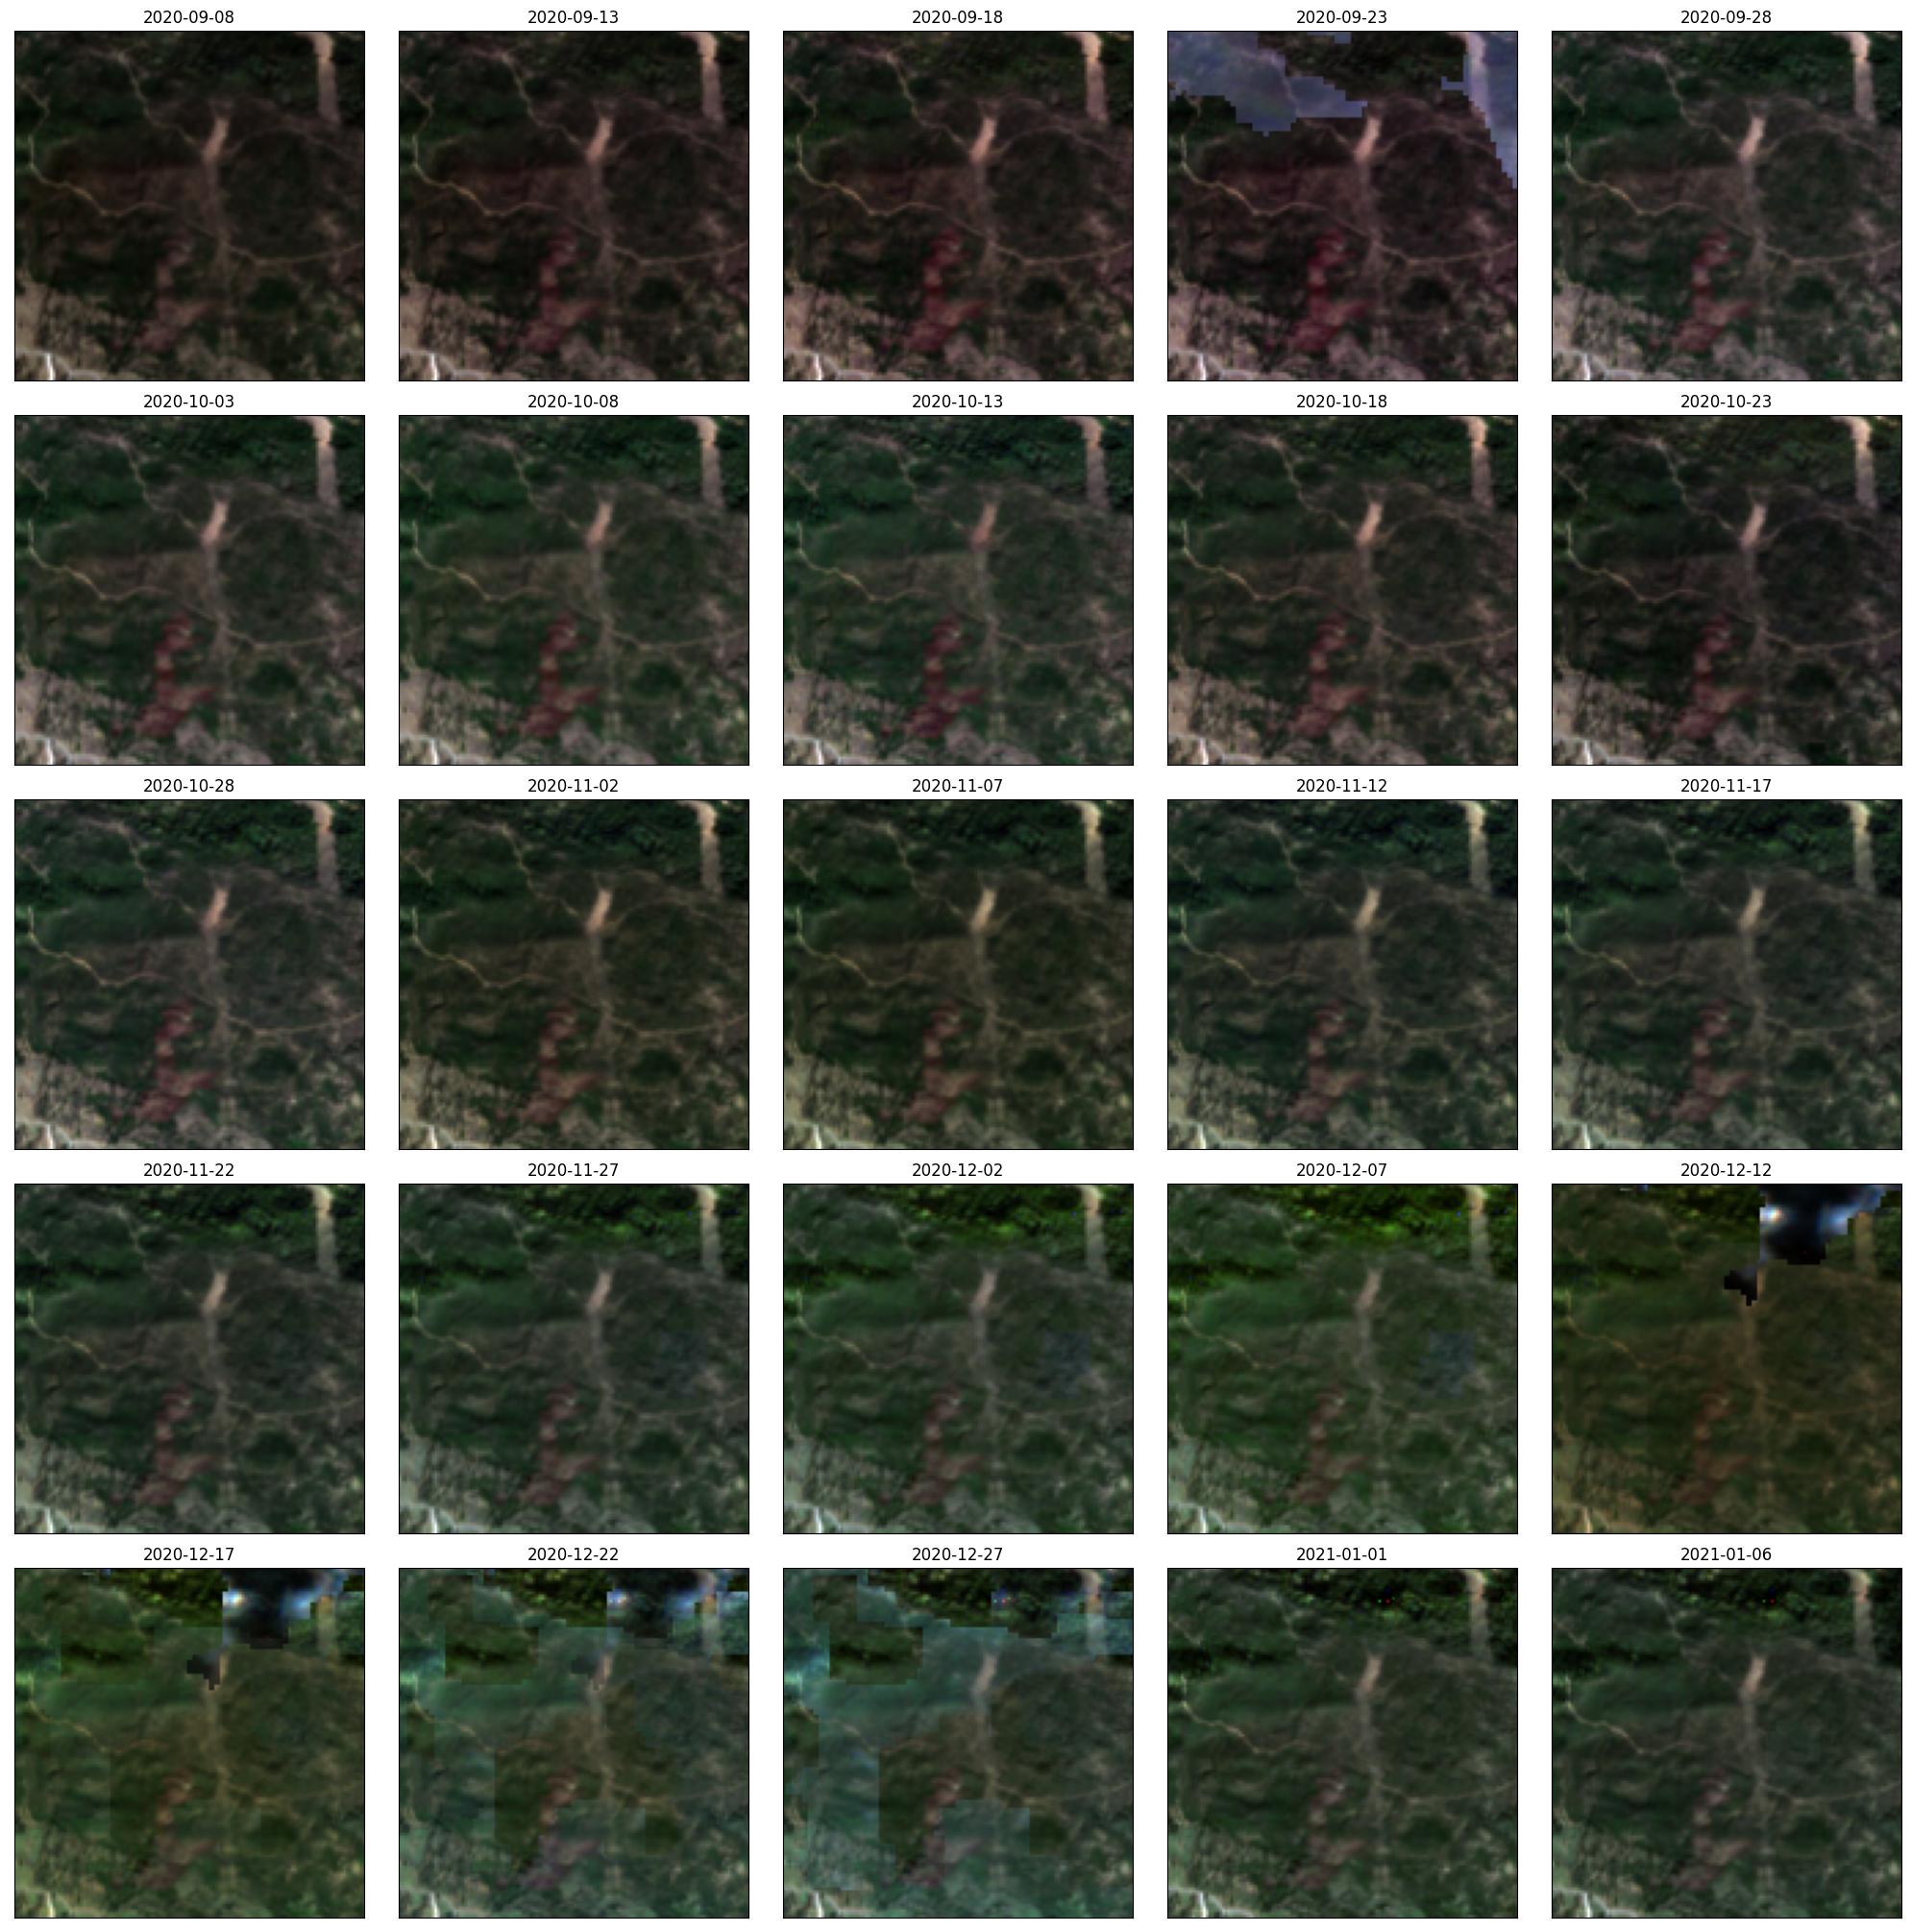

In [5]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

def brighten(band):
    alpha=1
    beta=0
    return np.clip(alpha*band+beta, 0,255)

minicube = xr.open_dataset(filepath)
time = np.where(minicube.s2_avail.values == 1)[0]

fig, axes = plt.subplots(nrows=5, ncols=5, constrained_layout=True, figsize=(20, 20))
t= 4 
for i in range(5):
    for j in range(5):
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(minicube.isel(time=t).time.dt.date.values)

        red = brighten(normalize(minicube.isel(time=t).s2_B04))
        green = brighten(normalize(minicube.isel(time=t).s2_B03))
        blue = brighten(normalize(minicube.isel(time=t).s2_B02))

        rgb_composite= np.dstack((red, green, blue))
        axes[i,j].imshow(rgb_composite)
        t += 5

In [ ]:
minicube = xr.open_dataset(filepath)
time = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=time).values < 1.0)
s2_cube = minicube.s2_B07.sel(time=time)
data = s2_cube * mask

NameError: name 'filepath' is not defined

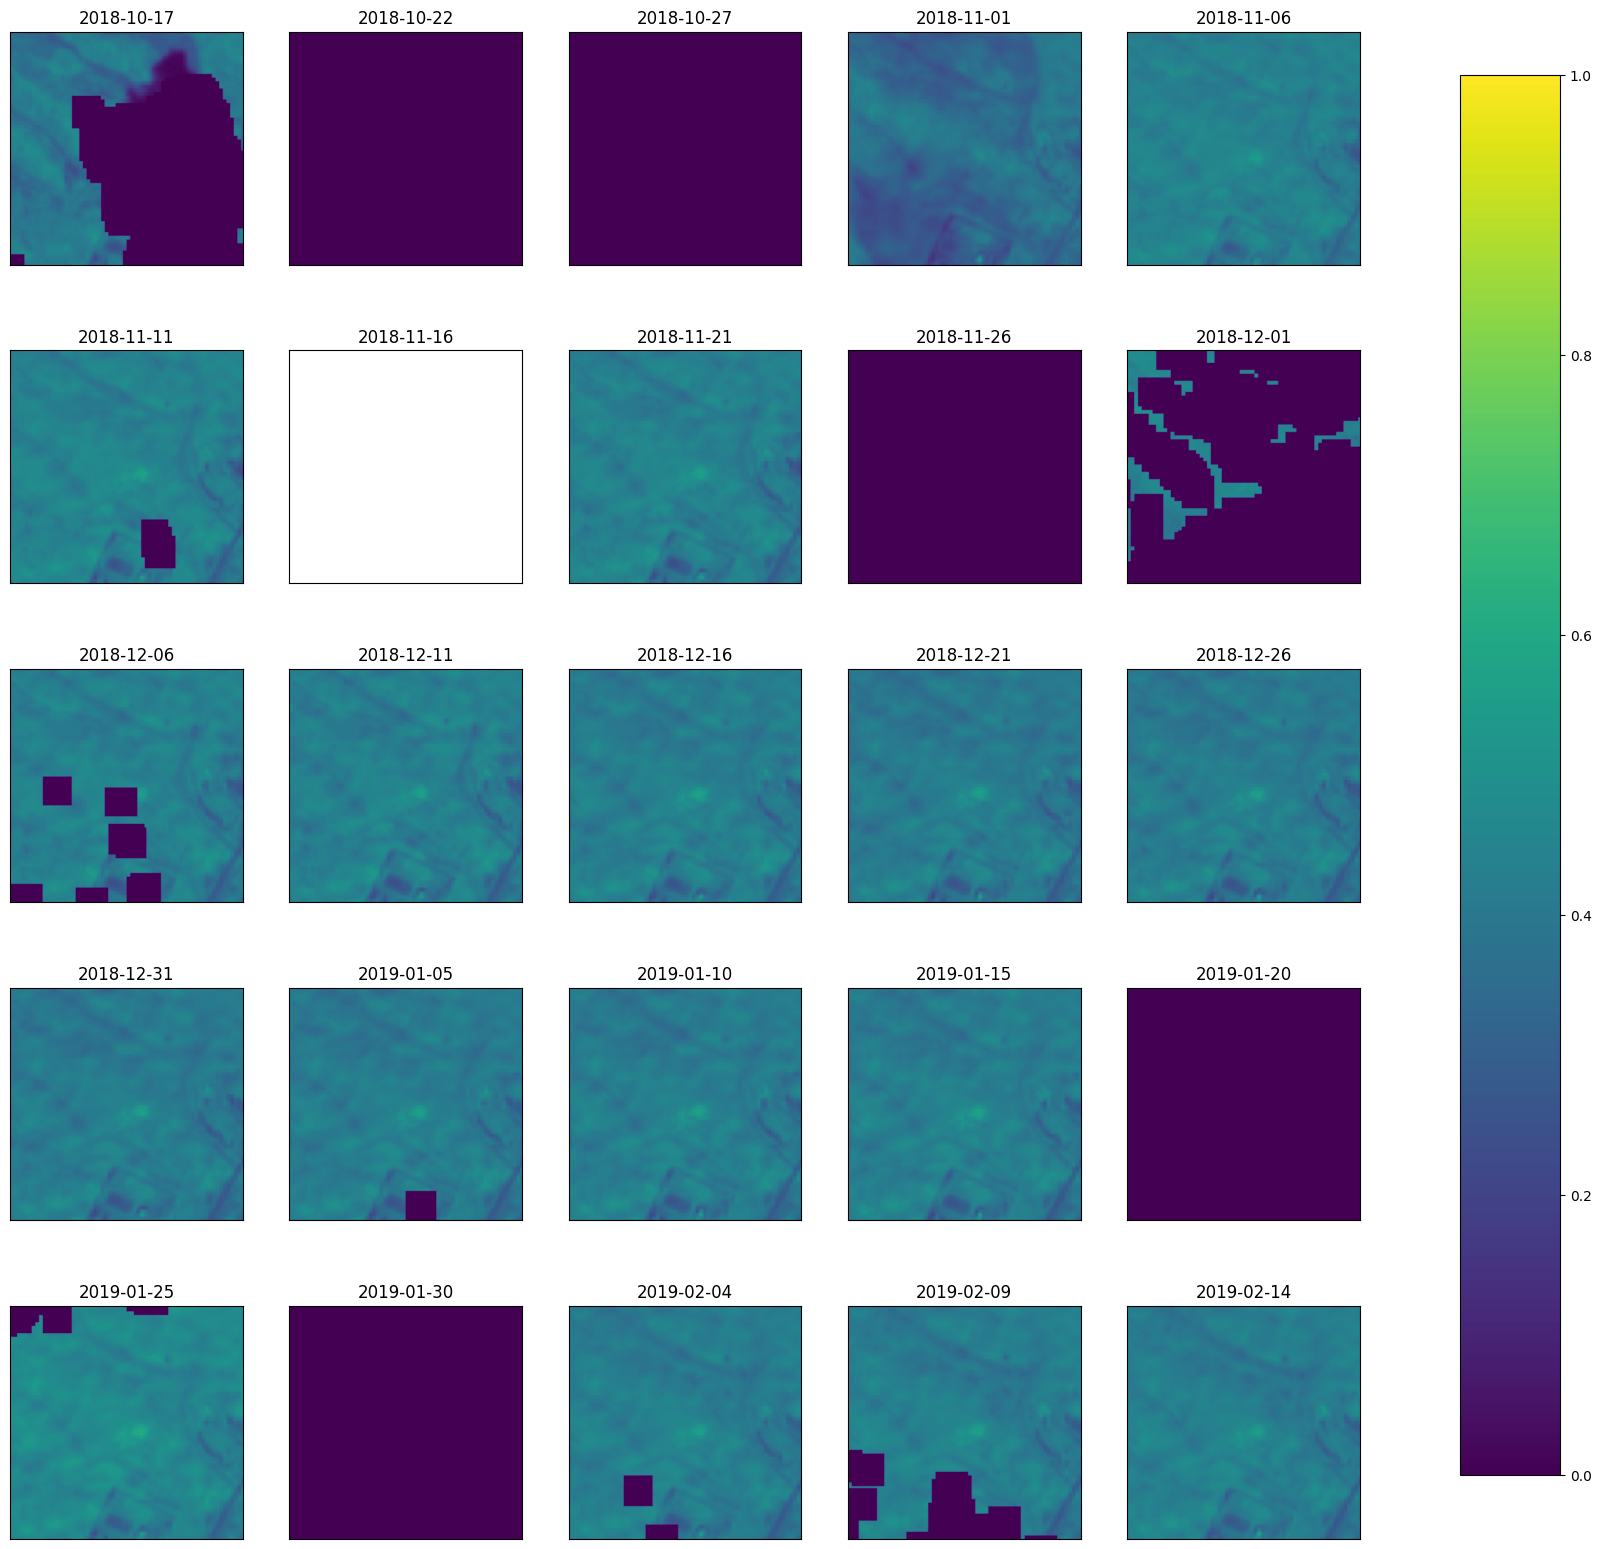

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(data.isel(time=t).time.dt.date.values)
        im = axes[i,j].imshow(data.isel(time=t), vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


In [6]:
temporal_variables = [
        "era5land_t2m_mean",
        "era5land_pev_mean",
        "era5land_slhf_mean",
        "era5land_ssr_mean",
        "era5land_sp_mean",
        "era5land_sshf_mean",
        "era5land_e_mean",
        "era5land_tp_mean",
        "era5land_t2m_min",
        "era5land_pev_min",
        "era5land_slhf_min",
        "era5land_ssr_min",
        "era5land_sp_min",
        "era5land_sshf_min",
        "era5land_e_min",
        "era5land_tp_min",
        "era5land_t2m_max",
        "era5land_pev_max",
        "era5land_slhf_max",
        "era5land_ssr_max",
        "era5land_sp_max",
        "era5land_sshf_max",
        "era5land_e_max",
        "era5land_tp_max",
        "era5_e",
        "era5_pet",
        "era5_pev",
        "era5_ssrd",
        "era5_t2m",
        "era5_t2mmax",
        "era5_t2mmin",
        "era5_tp",
        "sg_bdod_top_mean",
        "sg_bdod_sub_mean",
        "sg_cec_top_mean",
        "sg_cec_sub_mean",
        "sg_cfvo_top_mean",
        "sg_cfvo_sub_mean",
        "sg_clay_top_mean",
        "sg_clay_sub_mean",
        "sg_nitrogen_top_mean",
        "sg_nitrogen_sub_mean",
        "sg_phh2o_top_mean",
        "sg_phh2o_sub_mean",
        "sg_ocd_top_mean",
        "sg_ocd_sub_mean",
        "sg_sand_top_mean",
        "sg_sand_sub_mean",
        "sg_silt_top_mean",
        "sg_silt_sub_mean",
        "sg_soc_top_mean",
        "sg_soc_sub_mean",
    ]

In [5]:
from scipy import interpolate
data = minicube[temporal_variables[0]]
mask = ~np.isnan(data)
xi = np.arange(data.shape[0])[mask]
yi = data.values[mask]

# xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
interp = interpolate.interp1d(xi, yi, kind = "linear")

x = np.arange(85) 
y = interp(x)
plt.plot(xi, yi, 'o', label = "$Pi$")
plt.plot(x, y, "-", label = "Cubic")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

NameError: name 'minicube' is not defined

In [122]:
x = np.array([1, 2, 3, 4, 5])
f = lambda x: x ** 2
squares = f(x)

xi = np.arange(data.shape[0])[mask[:, 0, 0]]
yi = data[:, 0, 0].values[mask[:, 0, 0]]

# xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
#interp = lambda x, y: interpolate.interp1d(np.arange(data.shape[0])[mask[:, x, y]], data[:, x, y].values[mask[:, x, y]], kind = "cubic")
#vec = interpolate.interp1d(np.arange(data.shape[0])[mask[:, x, y]], data[:, x, y].values[mask[:, x, y]], kind = "cubic")
import time
t = time.time()
def interp(x, y):
    xi = np.arange(data.shape[0])[mask[:, x, y]]
    yi =  data[:, x, y].values[mask[:, x, y]]
    interp = interpolate.interp1d(xi, yi, kind = "cubic")
    return 

A = np.arange(128)
B = np.arange(128)
vecinterp = np.vectorize(interp)
vecinterp(A, B)
print(time.time() - t)



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [138]:
import time
import copy
t = time.time()
minicube = xr.open_dataset(filepath)
step = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=step).values < 1.0)

data = minicube.s2_B07.sel(time=step).values * mask

def interpolation(data, mask):
    def interp(x, y):
        xi = np.arange(data.shape[0])[new_mask[:, x, y]]
        yi =  data[:, x, y][new_mask[:, x, y]]
        interp = interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~new_mask[:, x, y]]
        data[:, x, y][~new_mask[:, x, y]] = interp(xj)
        return

    xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

    data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
    data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
    new_mask = copy.deepcopy(mask)
    new_mask[0,:,:] = new_mask[-1,:,:] = True
    vecinterp = np.vectorize(interp)
    vecinterp(xx, yy)
    return 


interpolation(data, mask)
print(time.time() - t)
# minicube.s2_B07.values[step, :, :] = data
xr.where(minicube.s2_B07.time in step, data, minicube.s2_B07)
data = minicube.s2_B07.sel(time=step).values
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        im = axes[i,j].imshow(data[t,:,:], vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

1.6346497535705566


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [132]:
minicube.s2_B07.sel(time=step).values = data
minicube.s2_B07

<xarray.DataArray 's2_B07' (time: 450, lat: 128, lon: 128)>
[7372800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-10-13 2018-10-14 ... 2020-01-05
  * lon      (lon) float64 2.873 2.873 2.873 2.874 ... 2.887 2.887 2.887 2.887
  * lat      (lat) float64 33.93 33.93 33.93 33.93 ... 33.92 33.92 33.92 33.92
Attributes:
    provider:            Sentinel 2
    interpolation_type:  linear
    description:         Red edge 3

In [115]:
#from numba import cuda
# from numba import jit
import scipy as sy
# from scipy import interpolate
import time
t = time.time()
minicube = xr.open_dataset(filepath)
step = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=step).values < 1.0)

data = minicube.s2_B07.sel(time=step).values * mask

gridsize = 1024
blocksize = 1024

# @cuda.jit #(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = sy.interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
mask[0,:,:] = mask[-1,:,:] = True

vecinterp = np.vectorize(interp)
vecinterp[gridsize, blocksize](xx, yy)
print(time.time() - t)

TypeError: 'vectorize' object is not subscriptable

In [ ]:
from multiprocessing import Process
import scipy as sy
import time

t = time.time()
minicube = xr.open_dataset(filepath)
step = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=step).values < 1.0)

# data = minicube.s2_B07.sel(time=step).values * mask
data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
mask[0,:,:] = mask[-1,:,:] = True

gridsize = 1024
blocksize = 1024

def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = sy.interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))


vecinterp = np.vectorize(interp)
vecinterp[gridsize, blocksize](xx, yy)

p = Process(target=bubble_sort, args=([1,9,4,5,2,6,8,4],))
p.start()
p.join()
print(time.time() - t)

In [111]:
t = time.time()
@jit #(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = sy.interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
mask[0,:,:] = mask[-1,:,:] = True
vecinterp = np.vectorize(interp)
vecinterp(xx, yy)
print(time.time() - t)

/tmp/ipykernel_161650/129479887.py:3: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def interp(x, y):
/tmp/ipykernel_161650/129479887.py:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "interp" failed type inference due to: Unknown attribute 'interp1d' of type Module(<module 'scipy.interpolate' from '/User/homes/crobin/miniconda3/envs/EarthnetEnv2/lib/python3.8/site-packages/scipy/interpolate/__init__.py'>)

File "../../../../../../../../../tmp/ipykernel_161650/129479887.py", line 6:
<source missing, REPL/exec in use?>

During: typing of get attribute at /tmp/ipykernel_161650/129479887.py (6)

File "../../../../../../..

2.0385236740112305


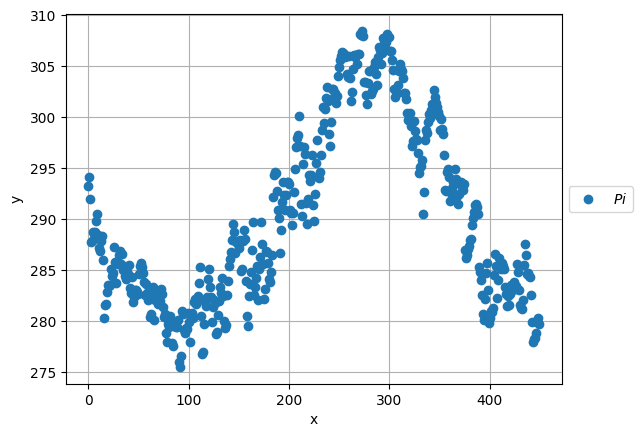

In [94]:
data = minicube.era5_t2m.values
xi = np.arange(data.shape[0])
yi = data

def interpolation(data, mask):
    def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

    xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

    data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
    data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
    mask[0,:,:] = mask[-1,:,:] = True
    vecinterp = np.vectorize(interp)
    vecinterp(xx, yy)
    print(time.time() - t)

plt.plot(xi, yi, 'o', label = "$Pi$")
# plt.plot(x, y, "-", label = "Cubic")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

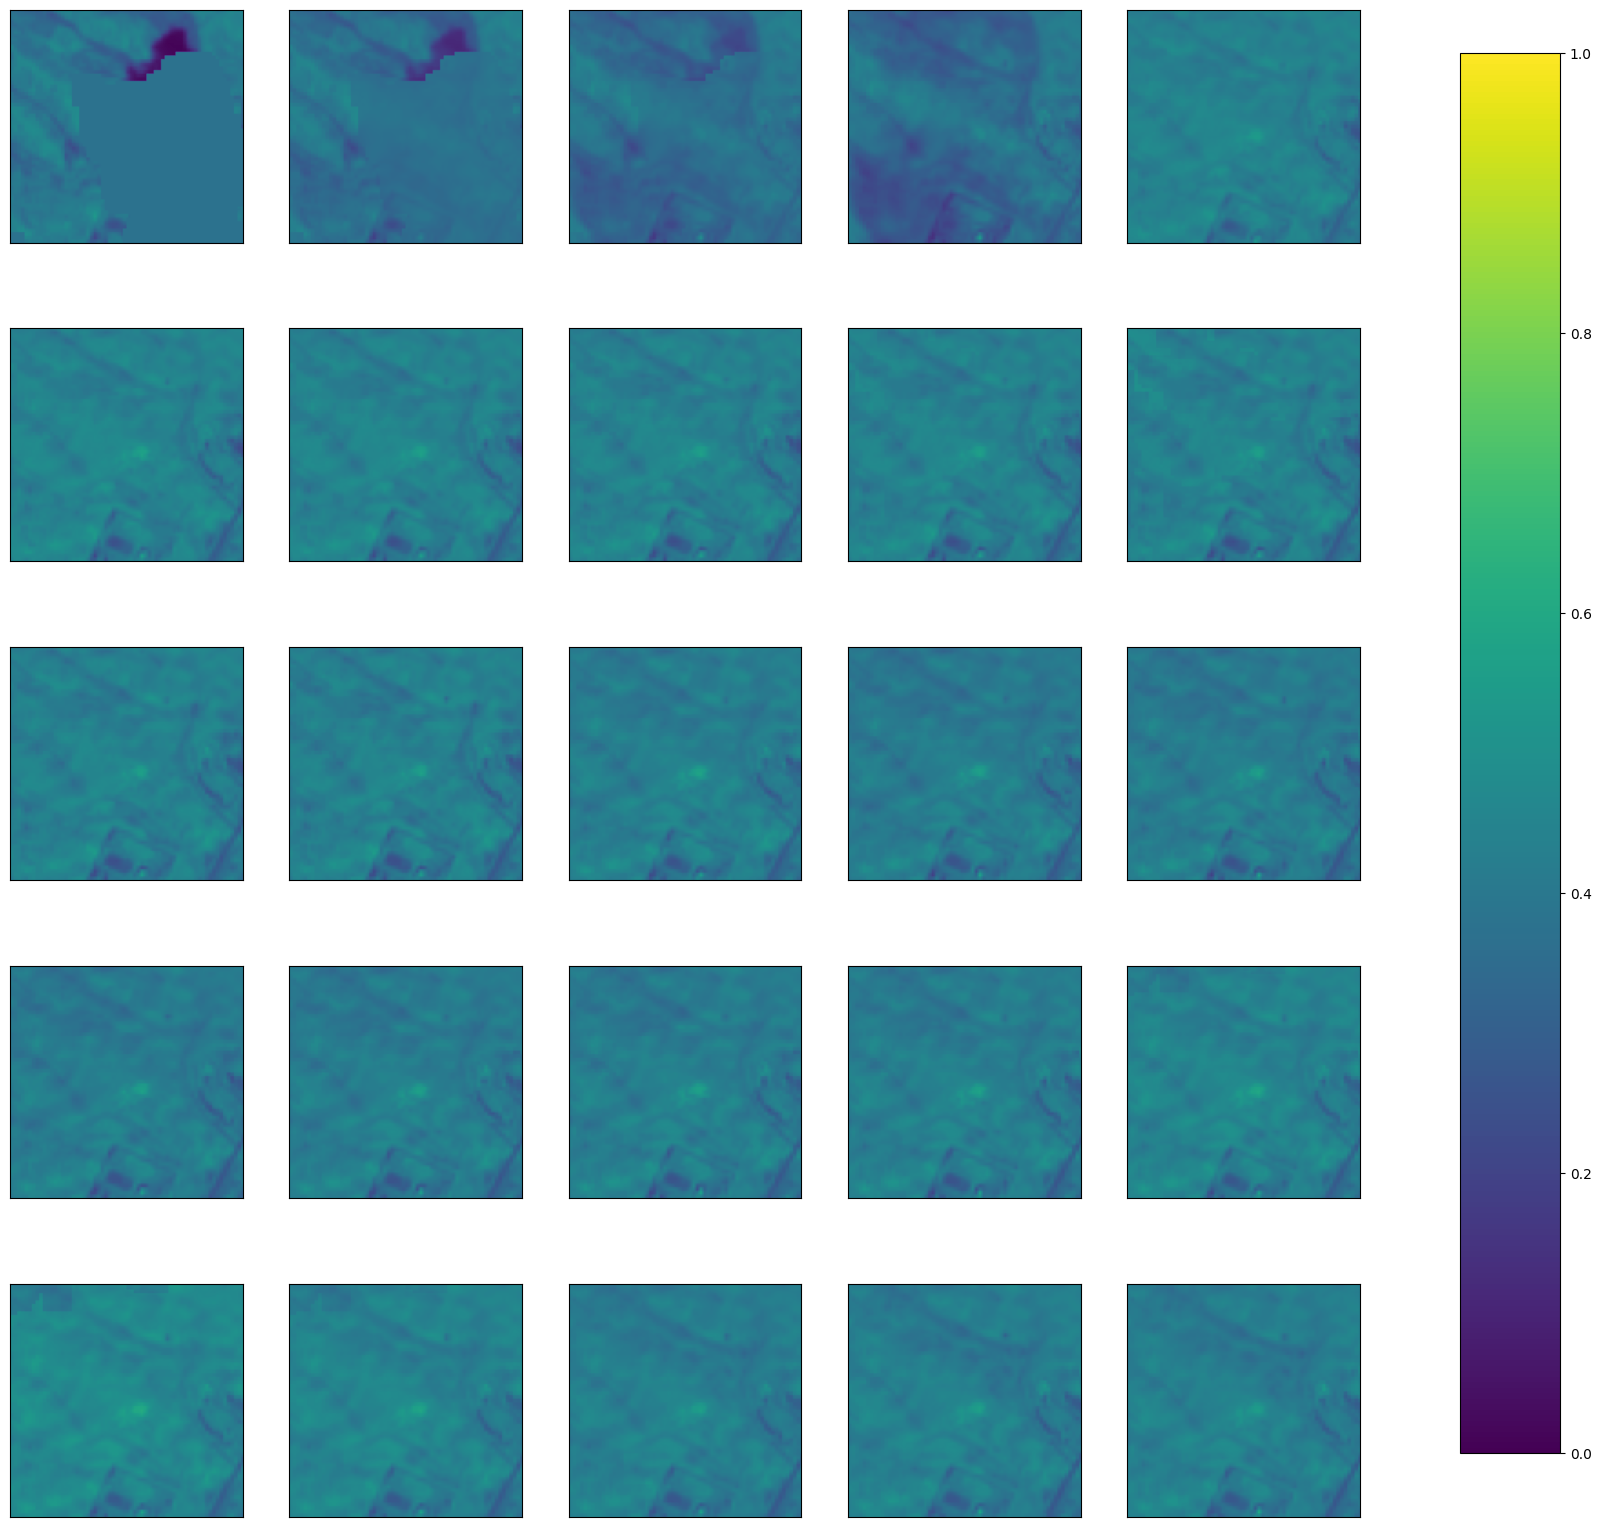

In [93]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        im = axes[i,j].imshow(data[t,:,:], vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

In [32]:
import torch 
from torch import Tensor

minicube = xr.open_dataset(filepath)
time = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=time).values < 1.0)
s2_cube = minicube.s2_B07.sel(time=time)
data = s2_cube * mask
data = torch.from_numpy(data.values)

# Define a function to perform temporal interpolation to fill missing values
def interpolate_temporal(data):
    # Get the shape of the tensor
    shape = data.shape


    # Iterate over spatial positions
    for i in range(shape[1]):
        for j in range(shape[2]):
            # Get the values and indices along the time_steps dimension
            values = data[:, i, j]
            indices = torch.arange(len(values))
            # Create a mask for non-missing values
            mask = ~torch.isnan(values)

            # If the first frame has missing values, fill them with the mean of the frame
            if not mask[0]:
                values[0] = np.nanmean(values)

            # If the last frame has missing values, fill them with the mean of the frame
            if not mask[-1]:
                values[-1] = np.nanmean(values)

            # Perform interpolation using only non-missing values
            if mask.any():
                values[mask] = torch.interp(indices[mask].float(), indices[mask][0].float(), values[mask])

            # Assign the interpolated values back to the tensor
            data[:, i, j] = values

    return data

# Interpolate the missing values along the time_steps dimension (temporal interpolation)
interpolated_data = interpolate_temporal(data)

AttributeError: module 'torch' has no attribute 'interp'

In [39]:
import torch
import numpy as np
from scipy.interpolate import interp1d


# Define a function to perform temporal interpolation to fill missing values
def interpolate_temporal(data):
    # Get the shape of the tensor
    shape = data.shape

    # Create a copy of the tensor as a numpy array
    data_np = data.clone().numpy()

    # Iterate over spatial positions
    for i in range(shape[1]):
        for j in range(shape[2]):
            # Get the values and indices along the time_steps dimension
            values = data_np[:, i, j]

            indices = np.arange(len(values))

            # Create a mask for non-missing values
            mask = ~np.isnan(values)

            # If the first frame has missing values, fill them with the mean of the frame
            if not mask[0]:
                values[0] = np.nanmean(values)
                mask[0] = True
            # If the last frame has missing values, fill them with the mean of the frame
            if not mask[-1]:
                values[-1] = np.nanmean(values)
                mask[-1] = True

            # Perform interpolation using only non-missing values
            if mask.any():
                # Use linear interpolation to fill missing values
                interp_func = interp1d(indices[mask], values[mask], kind='linear', fill_value='extrapolate')
                values[~mask] = interp_func(indices[~mask])
            # Assign the interpolated values back to the numpy array
            data_np[:, i, j] = values
    # Convert the numpy array back to a PyTorch tensor
    interpolated_data = torch.tensor(data_np)

    return interpolated_data


minicube = xr.open_dataset(filepath)
time = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=time).values < 1.0)
s2_cube = minicube.s2_B07.sel(time=time)
data = s2_cube * mask
data = np.where(data == 0, np.nan, data)
spatio_temporal_tensor = torch.from_numpy(data)

# Interpolate the missing values along the time_steps dimension (temporal interpolation)
interpolated_data = interpolate_temporal(spatio_temporal_tensor)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

In [41]:
import torch
import numpy as np
from scipy.interpolate import interp1d
import torch.multiprocessing as mp

# Define a function to perform temporal interpolation and handle missing values
def interpolate_temporal_chunk(data, chunk_indices):
    # Get the shape of the tensor
    shape = data.shape

    # Create a copy of the tensor as a numpy array
    data_np = data.clone().numpy()

    # Iterate over spatial positions in the given chunk_indices
    for i, j in chunk_indices:
        # Get the values and indices along the time_steps dimension
        values = data_np[:, i, j]
        indices = np.arange(len(values))

        # Create a mask for non-missing values
        mask = ~np.isnan(values)

        # If the first frame has missing values, fill them with the mean of the frame
        if not mask[0]:
            values[0] = np.nanmean(values)
            mask[0] = True

        # If the last frame has missing values, fill them with the mean of the frame
        if not mask[-1]:
            values[-1] = np.nanmean(values)
            mask[-1] = True

        # Perform interpolation using only non-missing values
        if mask.any():
            # Use linear interpolation to fill missing values
            interp_func = interp1d(indices[mask], values[mask], kind='linear', fill_value='extrapolate')
            interp_values = interp_func(indices)
            values[~mask] = interp_values[~mask]

        # Assign the interpolated values back to the numpy array
        data_np[:, i, j] = values

    # Convert the numpy array back to a PyTorch tensor
    interpolated_data = torch.tensor(data_np)

    return interpolated_data

# Define the number of processes
num_processes = 4

# Split spatial positions into chunks for parallel processing
height, width = spatio_temporal_tensor.shape[1:]
chunk_size = height * width // num_processes
chunks = [(i, j) for i in range(height) for j in range(width)]
chunked_indices = [chunks[i:i+chunk_size] for i in range(0, len(chunks), chunk_size)]

# Function to run the interpolation in parallel for a chunk of data
def parallel_interpolate(chunk_index, data):
    return interpolate_temporal_chunk(data, chunk_index)

# Create a list to store the process results
results = []

# Start the multiprocessing pool
with mp.Pool(processes=num_processes) as pool:
    for chunk_idx in chunked_indices:
        result = pool.apply_async(parallel_interpolate, args=(chunk_idx, spatio_temporal_tensor))
        results.append(result.get())

# Combine the results from all processes
interpolated_data = torch.cat(results)



KeyboardInterrupt: 

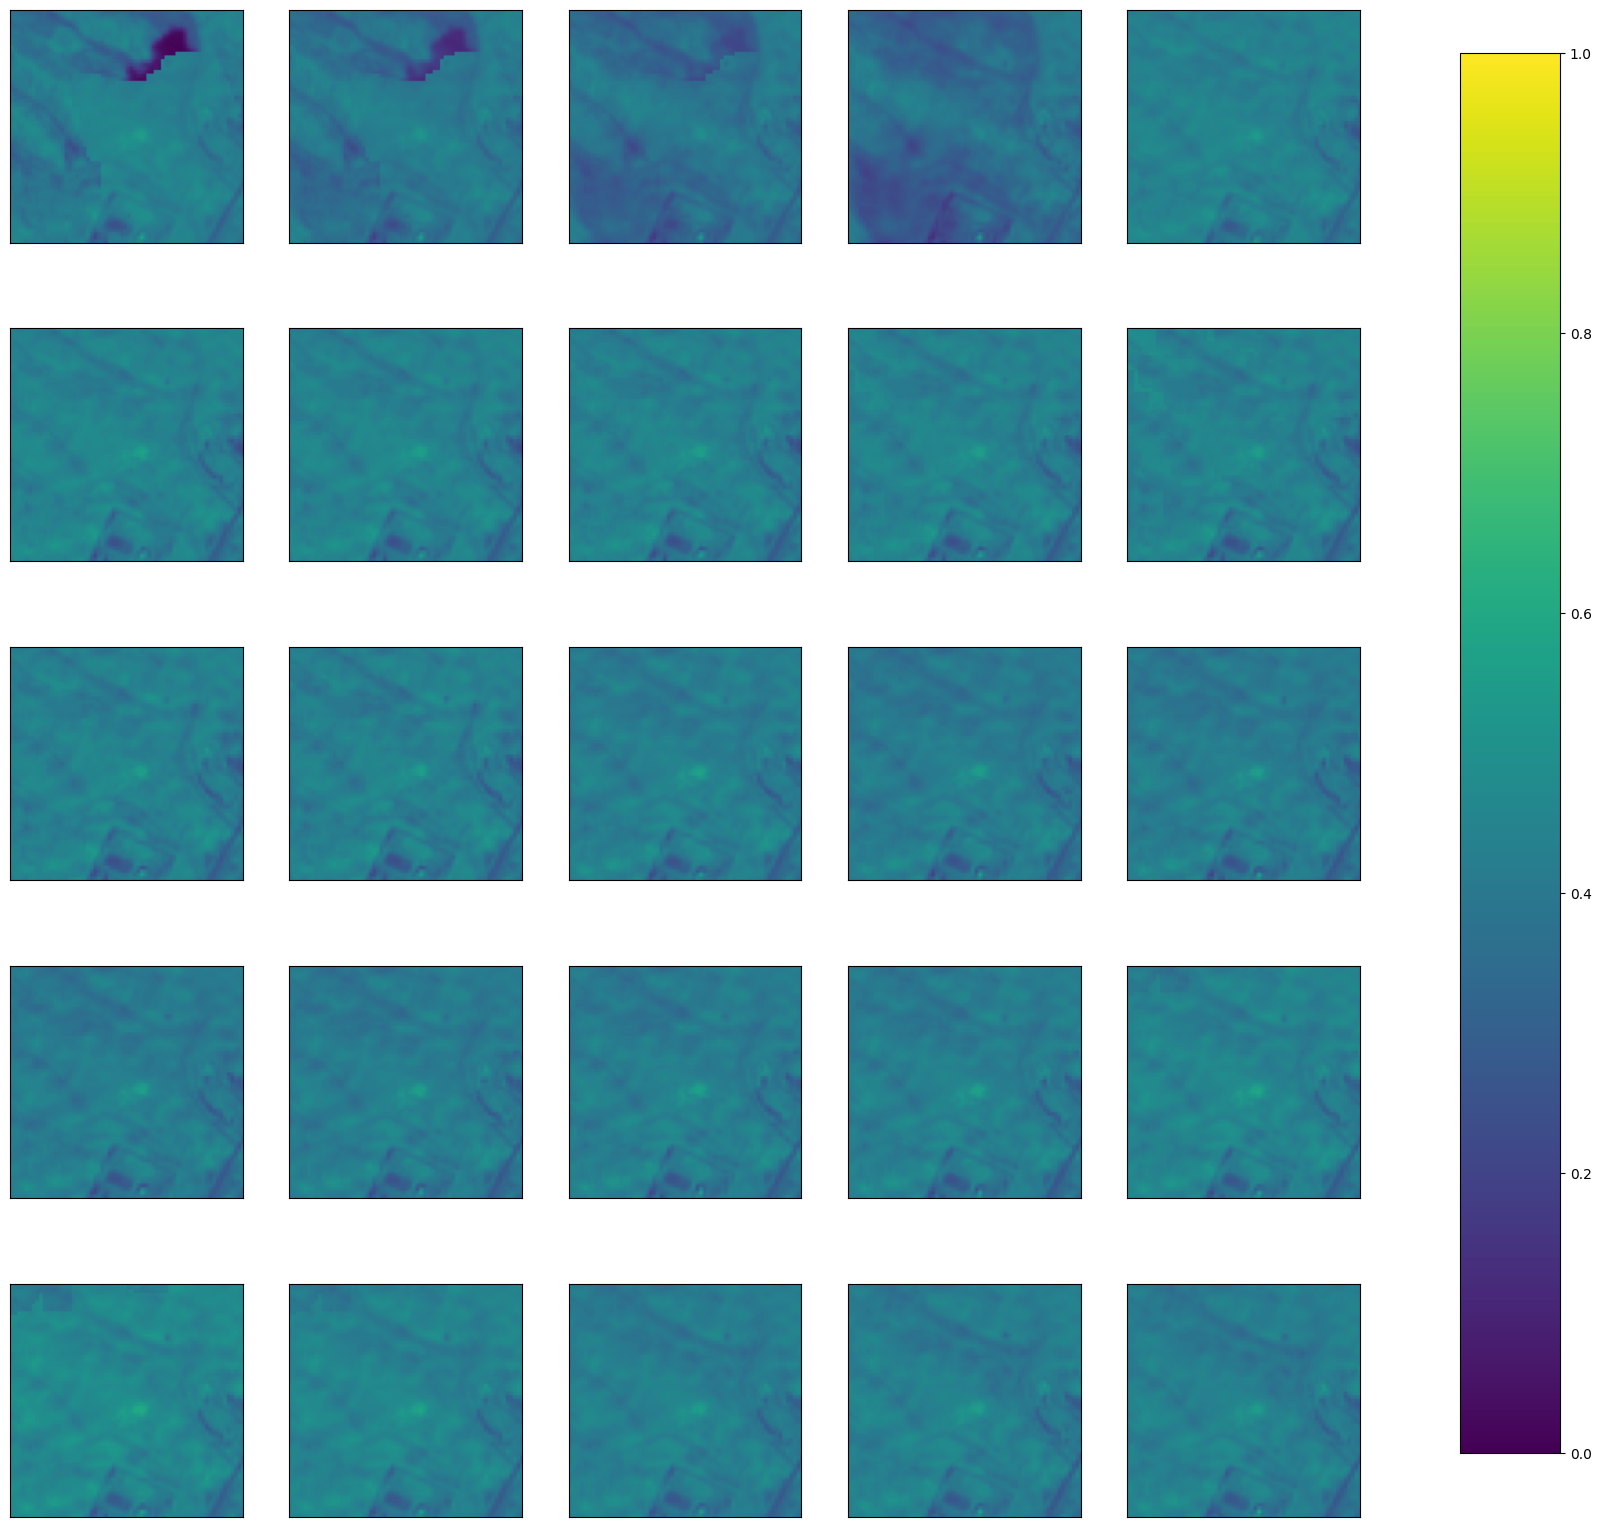

In [40]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        im = axes[i,j].imshow(interpolated_data[t,:,:], vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

In [22]:
print(interpolated_data.shape)

torch.Size([90, 128, 128])
